In [3]:
import pandas as pd
import numpy as np
import csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import statistics
from PIL import Image 
import PIL

df =pd.read_csv('weatherAUS.csv')
df_states=pd.read_csv('aus_cities.csv', index_col=0)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [6]:
df = pd.DataFrame(df, columns = ['Date', 'Location', 'MinTemp', 'MaxTemp'])
syd_temps = df.loc[df['Location'] == 'Sydney']
syd_temps.dropna()
syd_temps

,Date,Location,MinTemp,MaxTemp
30176,2008-02-01,Sydney,19.5,22.4
30177,2008-02-02,Sydney,19.5,25.6
30178,2008-02-03,Sydney,21.6,24.5
30179,2008-02-04,Sydney,20.2,22.8
30180,2008-02-05,Sydney,19.7,25.7
...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6
33516,2017-06-22,Sydney,9.3,19.2
33517,2017-06-23,Sydney,9.4,17.7
33518,2017-06-24,Sydney,10.1,19.3


In [7]:
ade_temps = df.loc[df['Location'] == 'Adelaide']
ade_temps.dropna()
ade_temps

,Date,Location,MinTemp,MaxTemp
96320,2008-07-01,Adelaide,8.8,15.7
96321,2008-07-02,Adelaide,12.7,15.8
96322,2008-07-03,Adelaide,6.2,15.1
96323,2008-07-04,Adelaide,5.3,15.9
96324,2008-07-05,Adelaide,9.8,15.4
...,...,...,...,...
99508,2017-06-21,Adelaide,4.5,19.2
99509,2017-06-22,Adelaide,4.6,19.5
99510,2017-06-23,Adelaide,5.4,18.5
99511,2017-06-24,Adelaide,5.0,17.3


In [8]:
mel_temps = df.loc[df['Location'] == 'Melbourne']
mel_temps.dropna()
mel_temps

,Date,Location,MinTemp,MaxTemp
67200,2008-07-01,Melbourne,9.5,15.4
67201,2008-07-02,Melbourne,11.0,14.5
67202,2008-07-03,Melbourne,8.4,14.1
67203,2008-07-04,Melbourne,9.1,14.5
67204,2008-07-05,Melbourne,4.3,15.5
...,...,...,...,...
70388,2017-06-21,Melbourne,7.8,13.5
70389,2017-06-22,Melbourne,6.7,14.1
70390,2017-06-23,Melbourne,7.4,14.9
70391,2017-06-24,Melbourne,8.3,12.3


In [9]:
bris_temps = df.loc[df['Location'] == 'Brisbane']
bris_temps.dropna()
bris_temps

,Date,Location,MinTemp,MaxTemp
84007,2008-07-01,Brisbane,10.3,25.2
84008,2008-07-02,Brisbane,8.1,22.9
84009,2008-07-03,Brisbane,9.7,22.4
84010,2008-07-04,Brisbane,11.8,20.0
84011,2008-07-05,Brisbane,12.3,16.7
...,...,...,...,...
87195,2017-06-21,Brisbane,12.2,23.4
87196,2017-06-22,Brisbane,13.7,22.7
87197,2017-06-23,Brisbane,10.3,23.7
87198,2017-06-24,Brisbane,10.4,24.5


Text(0.5, 0.98, 'Sydney Temperatures (in Celsius)')

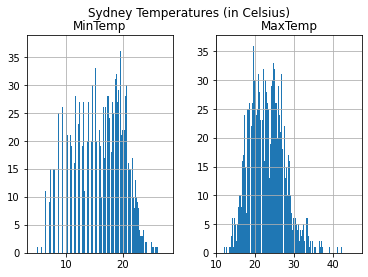

In [17]:
hist1 = syd_temps.hist(bins=365)
plt.suptitle("Sydney Temperatures (in Celsius)")

Text(0.5, 0.98, 'Adelaide Temperatures (in Celsius)')

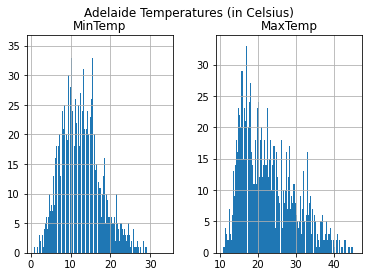

In [18]:
hist2 = ade_temps.hist(bins=365)
plt.suptitle("Adelaide Temperatures (in Celsius)")

Text(0.5, 0.98, 'Melbourne Temperatures (in Celsius)')

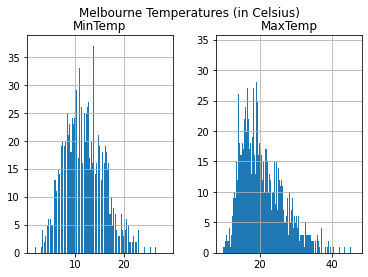

In [19]:
hist3 = mel_temps.hist(bins=365)
plt.suptitle("Melbourne Temperatures (in Celsius)")

Text(0.5, 0.98, 'Brisbane Temperatures (in Celsius)')

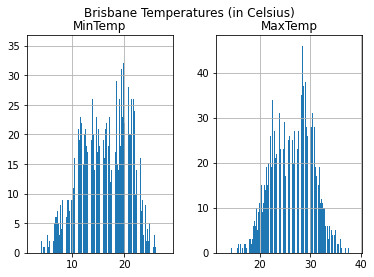

In [20]:
hist4 = bris_temps.hist(bins=365)
plt.suptitle("Brisbane Temperatures (in Celsius)")